### Plot Gen information for boosted tau massregression sample 

In [1]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-bhl1k31i because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "GenA1_inv":events.GenA1_inv,
                "dR_A1_Tau1":events.dR_A1_Tau1,
                "dR_A1_Tau2":events.dR_A1_Tau2,
                "dR_Tau1_Tau2":events.dR_Tau1_Tau2,
                "A1_pt": events.A1_pt,
                "Tau1_pt": events.Tau1_pt,
                "Tau2_pt":events.Tau2_pt,
                "A1_eta":events.A1_eta,
                "Tau1_eta":events.Tau1_eta,
                "Tau2_eta":events.Tau2_eta,
                "A1_phi": events.A1_phi,
                "Tau1_phi":events.Tau1_phi,
                "Tau2_phi":events.Tau2_phi,
                "Tau1_Tau2_dphi": events.Tau1_Tau2_dphi,
                "Tau1_Tau2_deta": events.Tau1_Tau2_deta,
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        
        amass = jet.GenA1_inv[jet.GenA1_inv > -22.22]
        
        apt = jet.A1_pt[jet.A1_pt>-22.22]
        aeta = jet.A1_eta[jet.A1_eta>-22.22]
        aphi = jet.A1_phi[jet.A1_phi>-22.22]
        tau1pt = jet.Tau1_pt[jet.Tau1_pt>-22.22]
        tau1eta = jet.Tau1_eta[jet.Tau1_eta>-22.22]
        tau1phi = jet.Tau1_phi[jet.Tau1_phi>-22.22]
        tau2pt = jet.Tau2_pt[jet.Tau2_pt>-22.22]
        tau2eta = jet.Tau2_eta[jet.Tau2_eta>-22.22]
        tau2phi = jet.Tau2_phi[jet.Tau2_phi>-22.22]
        tau1dr = jet.dR_A1_Tau1[jet.dR_A1_Tau1>-22.22]
        tau2dr = jet.dR_A1_Tau2[jet.dR_A1_Tau2>-22.22]
        taudr = jet.dR_Tau1_Tau2[jet.dR_Tau1_Tau2>-22.22]
        dphi = jet.Tau1_Tau2_dphi[jet.Tau1_Tau2_dphi > -22.22]
        deta = jet.Tau1_Tau2_deta[jet.Tau1_Tau2_deta > -22.22]
        
        
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)


        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(50, 10, 300, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
        # A eta -----------------------------------------------------------
        
        A_eta = (
            hist.Hist.new
            .StrCat([ "A_eta"], name="haeta")
            .Reg(10, -5, 5, name="eta_a", label="eta")
            .Int64()
        )
        
        A_eta.fill(haeta="A_eta", eta_a=aeta)
       
        # A phi -----------------------------------------------------------
        
        A_phi = (
            hist.Hist.new
            .StrCat([ "A_phi"], name="haphi")
            .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
            .Int64()
        )
        
        A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(19, 10, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 eta -----------------------------------------------------------
        
        Tau1_eta = (
            hist.Hist.new
            .StrCat([ "Tau1_eta"], name="htau1eta")
            .Reg(10, -5, 5, name="eta_tau1", label="Eta")
            .Int64()
        )
        
        Tau1_eta.fill(htau1eta="Tau1_eta", eta_tau1=tau1eta)
        
        # gen Tau1 phi -----------------------------------------------------------
        
        Tau1_phi = (
            hist.Hist.new
            .StrCat([ "Tau1_phi"], name="htau1phi")
            .Reg(10, -3.2, 3.2, name="phi_tau1", label="Phi")
            .Int64()
        )
        
        Tau1_phi.fill(htau1phi="Tau1_phi", phi_tau1=tau1phi)
        
        # gen Tau2 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(19, 10, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
       # gen Tau1 eta -----------------------------------------------------------
        
        Tau2_eta = (
            hist.Hist.new
            .StrCat([ "Tau2_eta"], name="htau2eta")
            .Reg(10, -5, 5, name="eta_tau2", label="Eta")
            .Int64()
        )
        
        Tau2_eta.fill(htau2eta="Tau2_eta", eta_tau2=tau2eta)
        
        # gen Tau1 phi -----------------------------------------------------------
        
        Tau2_phi = (
            hist.Hist.new
            .StrCat([ "Tau2_phi"], name="htau2phi")
            .Reg(10, -3.2, 3.2, name="phi_tau2", label="Phi")
            .Int64()
        )
        
        Tau2_phi.fill(htau2phi="Tau2_phi", phi_tau2=tau2phi)
        
        
        
        
        # gen tau1 A dR -----------------------------------------------------------
        
        tau1_A_dR = (
            hist.Hist.new
            .StrCat(["tau1_A_dr"], name="htau1jetdR")
            .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
            .Int64()
        )
        tau1_A_dR.fill(htau1jetdR="tau1_A_dr", tau1jetdr=tau1dr)
        
        # gen tau2 A dR -----------------------------------------------------------
        
        tau2_A_dR = (
            hist.Hist.new
            .StrCat(["tau2_A_dr"], name="htau2jetdR")
            .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
            .Int64()
        )
        tau2_A_dR.fill(htau2jetdR="tau2_A_dr", tau2jetdr=tau2dr)
        
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus_dR = (
            hist.Hist.new
            .StrCat(["taus_dr"], name="htausdR")
            .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        #A mass and pt 2D hist
        
#         A_mass_pt = (
#             hist.Hist.new
#             .StrCat(["A"], name="category")
#             .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
#             .Reg(50, 10, 300, name="pt_a", label="pT [GeV]").Int64()
#         )
#         A_mass_pt.fill(category="A",massa=amass, pt_a=apt)
        
        
        A_mass_pt = (
            hist.Hist.new
            
            .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
            .Reg(38, 10, 200, name="pt_a", label="pT [GeV]").Int64()
        )
        A_mass_pt.fill(massa=amass, pt_a=apt)

        
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),

                "a_mass":A_mass,
                
                "a_pt":A_pt,
                "a_eta":A_eta,
                "a_phi":A_phi,
                "tau1_pt":Tau1_pt,
                "tau1_eta":Tau1_eta,
                "tau1_phi":Tau1_phi,
                "tau2_pt":Tau2_pt,
                "tau2_eta":Tau2_eta,
                "tau2_phi":Tau2_phi,
                "tau1_A_dr":tau1_A_dR,
                "tau2_A_dr":tau2_A_dR,
                "taus_dr":taus_dR,
                "a_mass_pt":A_mass_pt,
                
               
                
              
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [3]:
with open("aToTauTau_massreg_dataset_1.json", "r") as fin:
    file_list_train1 = json.load(fin) 
with open("aToTauTau_massreg_dataset_2.json", "r") as fin:
    file_list_train2 = json.load(fin) 

fileset = {
    'train_dataset_1': file_list_train1 #
    ,'train_dataset_2': file_list_train2
                  
}


In [202]:
# filename = "root://cmseos.fnal.gov//store/user/bbbam/GenInfo_massreg_Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_pythia8_genInfo_dataset_1/230824_181311/0000/output_997.root"
# file = uproot.open(filename)
# events = NanoEventsFactory.from_root(
#     file,
#     treepath='/fevt/RHTree',
#     # "RHTree",
#     entry_start=None,
#     # entry_stop=1,
#     metadata={"train_dataset_1": "jet"},
#     schemaclass=BaseSchema,
# ).events()
# p = MyProcessor()
# out = p.process(events)
# out

In [6]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=10),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    processor_instance=MyProcessor()
)
out

Output()

{'train_dataset_2': {'entries': 22816521,
  'a_mass': Hist(
    StrCategory(['A mass'], name='hmassa'),
    Regular(36, 3.2, 17.2, name='massa', label='Mass [GeV]'),
    storage=Int64()) # Sum: 22816521.0,
  'a_pt': Hist(
    StrCategory(['A_pt'], name='hapt'),
    Regular(50, 10, 300, name='pt_a', label='pT [GeV]'),
    storage=Int64()) # Sum: 22816521.0,
  'a_eta': Hist(
    StrCategory(['A_eta'], name='haeta'),
    Regular(10, -5, 5, name='eta_a', label='eta'),
    storage=Int64()) # Sum: 22816521.0,
  'a_phi': Hist(
    StrCategory(['A_phi'], name='haphi'),
    Regular(10, -3.2, 3.2, name='phi_a', label='phi'),
    storage=Int64()) # Sum: 22816521.0,
  'tau1_pt': Hist(
    StrCategory(['Tau1_pt'], name='htau1pt'),
    Regular(19, 10, 200, name='pt_tau1', label='pT [GeV]'),
    storage=Int64()) # Sum: 17981119.0 (22816521.0 with flow),
  'tau1_eta': Hist(
    StrCategory(['Tau1_eta'], name='htau1eta'),
    Regular(10, -5, 5, name='eta_tau1', label='Eta'),
    storage=Int64()) # Sum:

### for dataset 1

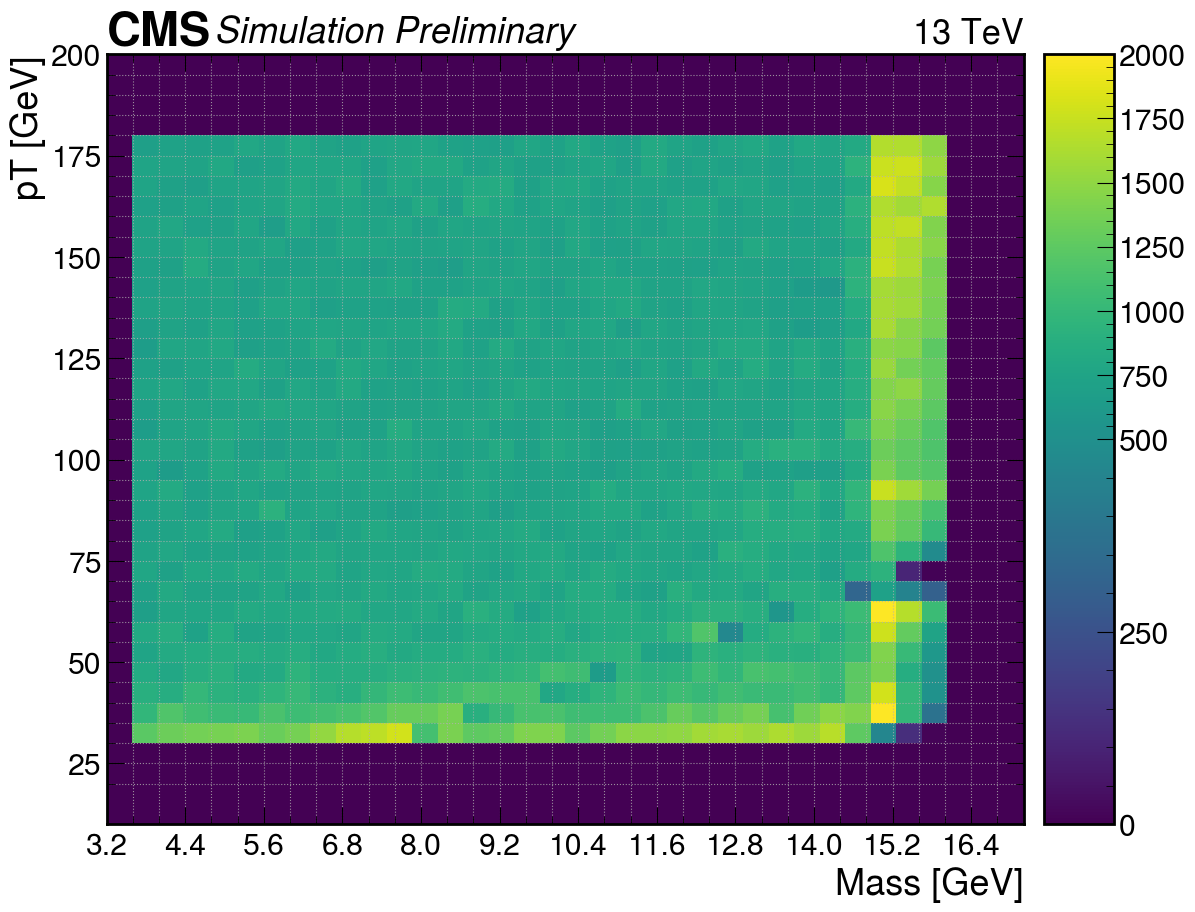

In [69]:
fig, ax = plt.subplots(figsize=(13,10))
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 2000, vcenter=500)
out["train_dataset_1"]["a_mass_pt"].plot2d(norm=norm)
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
ax.set_yticks(np.arange(20, 200, 5), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/a_mass_pt_2d_hist.png',facecolor='w',dpi=300)

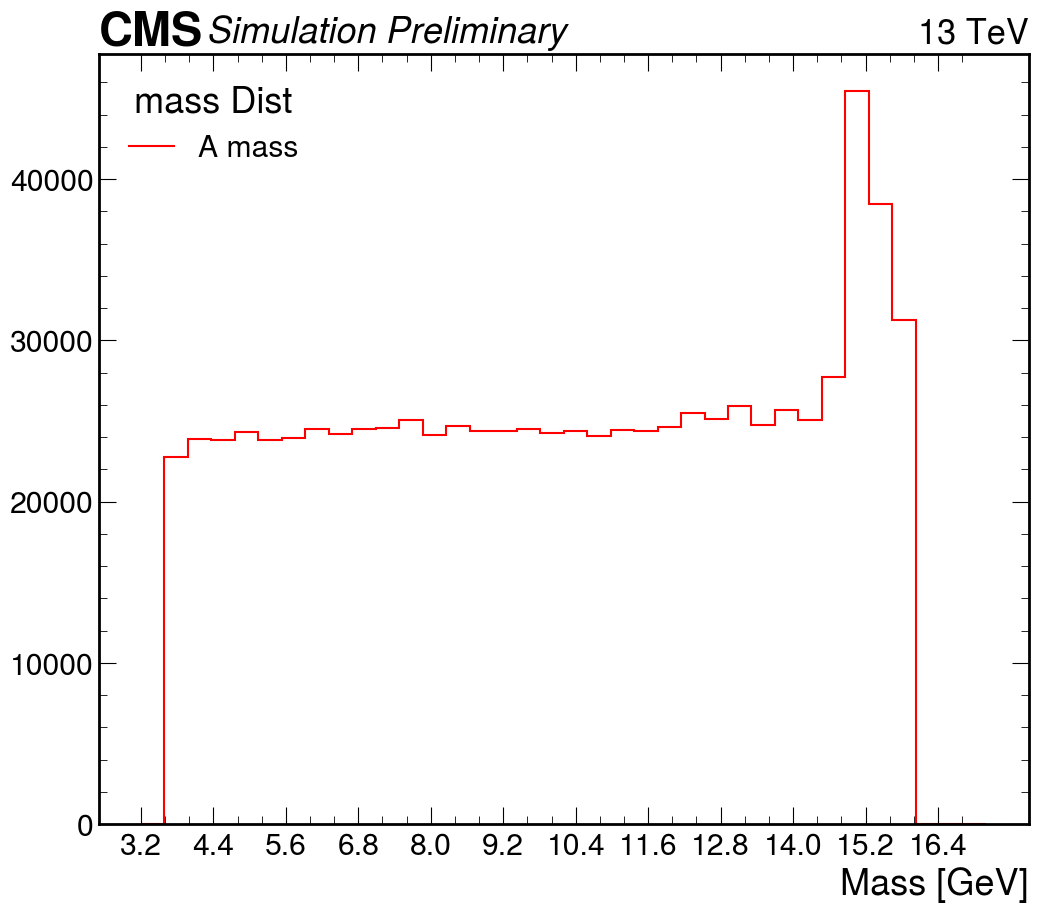

In [82]:
fig, ax = plt.subplots(figsize=(12,10))
out["train_dataset_1"]["a_mass"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="mass Dist")
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/a_mass_1d_hist.png',facecolor='w',dpi=300)

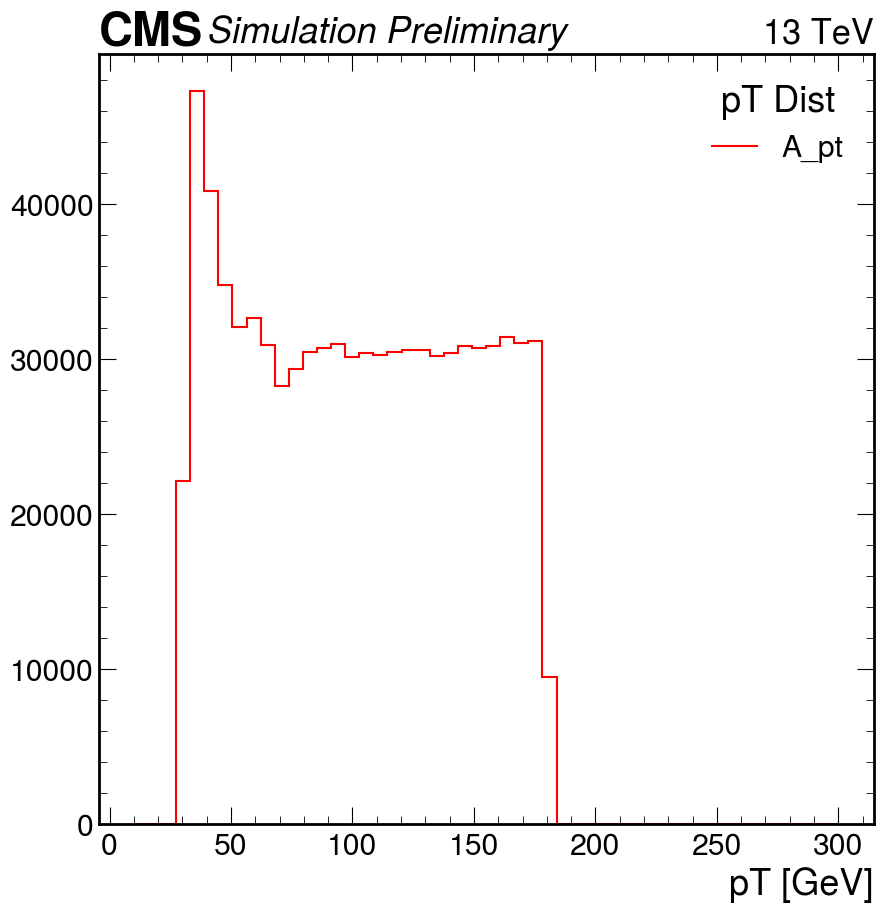

In [13]:
fig, ax = plt.subplots()
out["train_dataset_1"]["a_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend(title="pT Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/a_pt_1d_hist.png',facecolor='w',dpi=300)

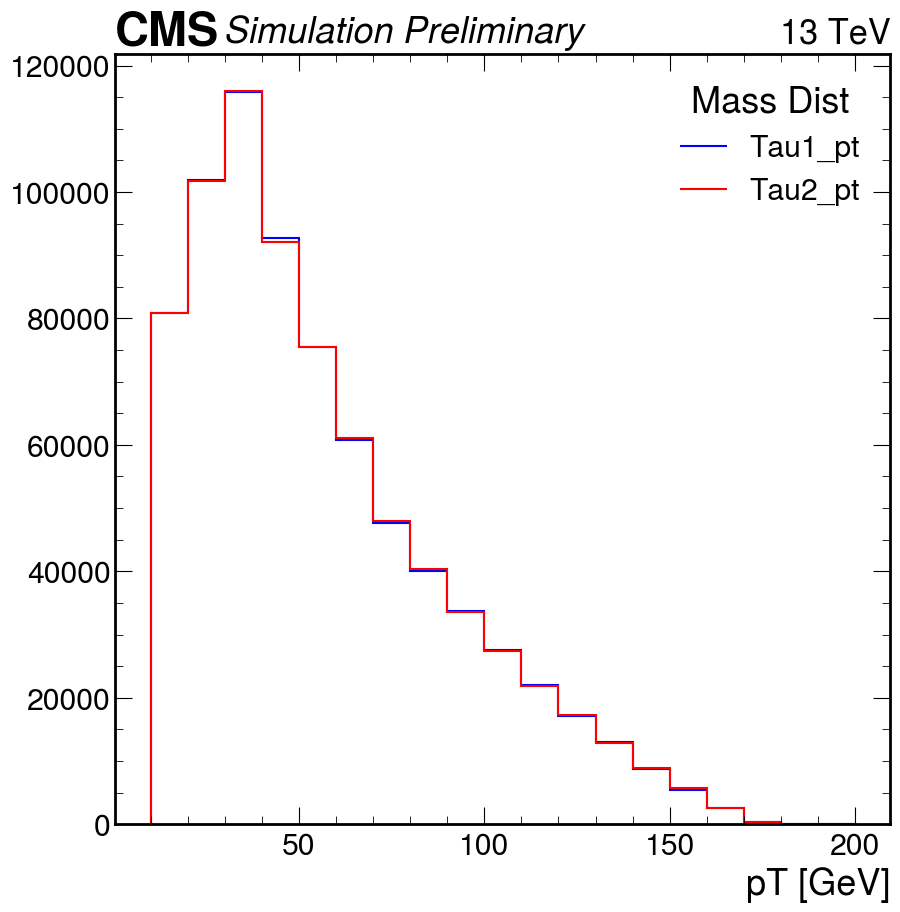

In [15]:
fig, ax = plt.subplots()
out["train_dataset_1"]["tau1_pt"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_1"]["tau2_pt"].plot1d(ax=ax,histtype='step', color='r')

# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/tau1pttau2pt_hist.png',facecolor='w',dpi=300)

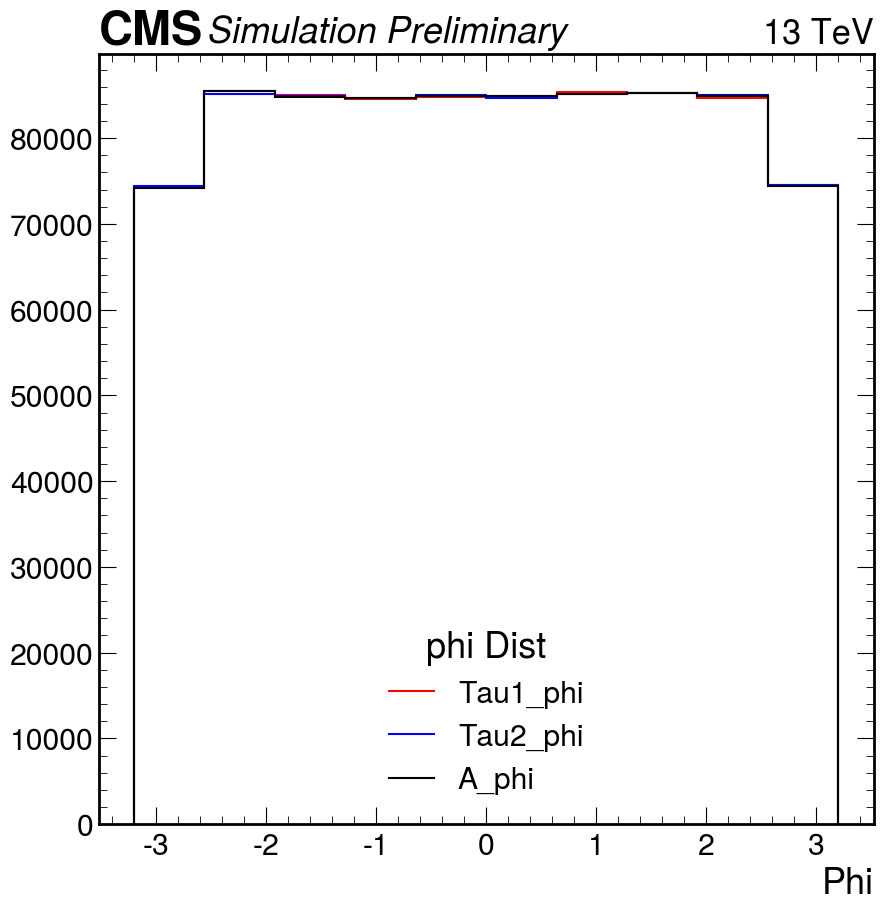

In [17]:
fig, ax = plt.subplots()
out["train_dataset_1"]["tau1_phi"].plot1d(ax=ax,histtype='step',color="r")
out["train_dataset_1"]["tau2_phi"].plot1d(ax=ax,histtype='step',color="b")
out["train_dataset_1"]["a_phi"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="phi Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/phi_dist_hist.png',facecolor='w',dpi=300)

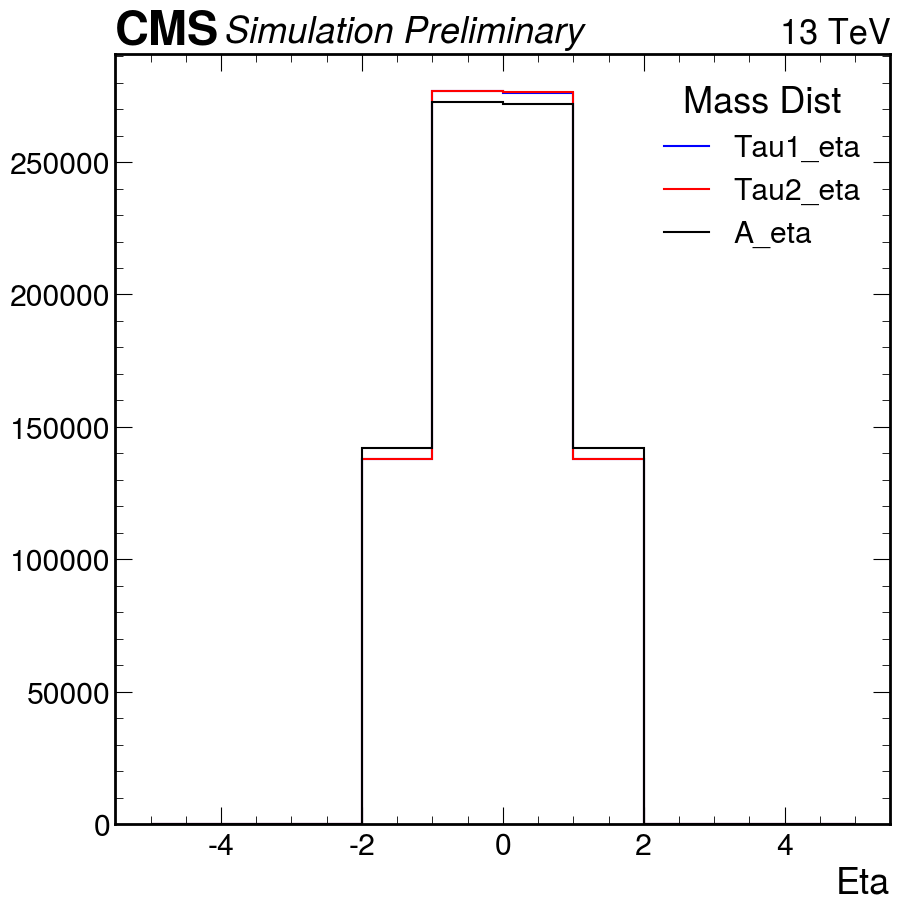

In [19]:
fig, ax = plt.subplots()
out["train_dataset_1"]["tau1_eta"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_1"]["tau2_eta"].plot1d(ax=ax,histtype='step', color='r')
out["train_dataset_1"]["a_eta"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/eta_dist_hist.png',facecolor='w',dpi=300)

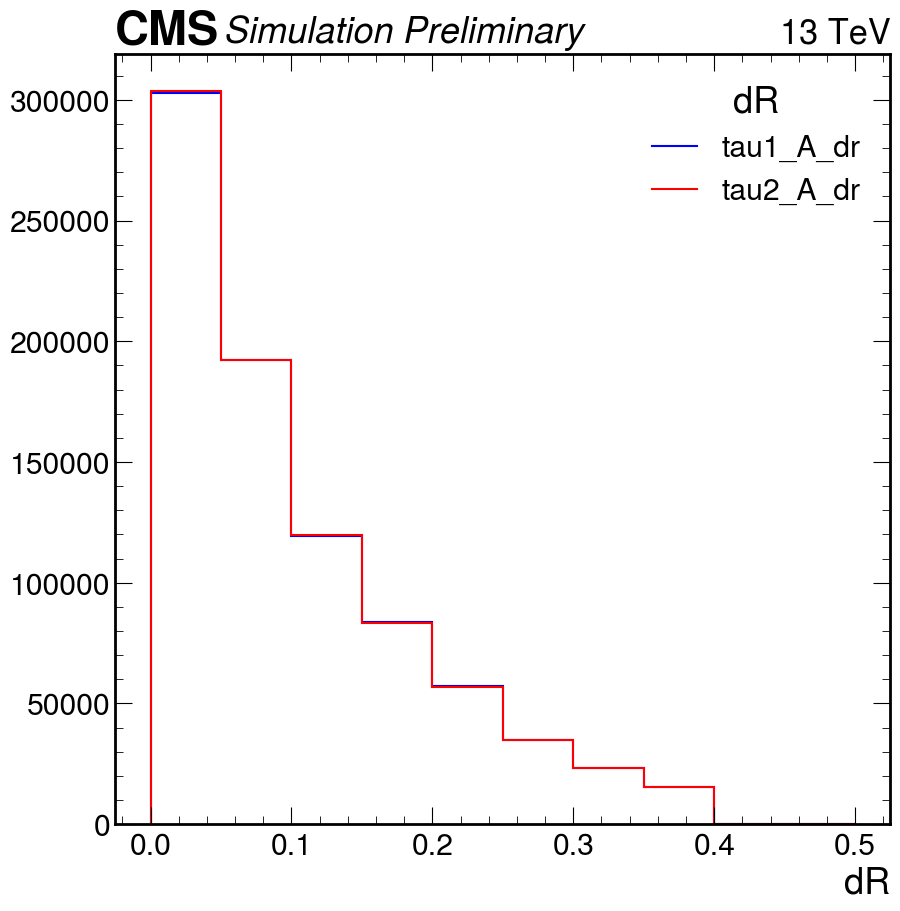

In [21]:
fig, ax = plt.subplots()
out["train_dataset_1"]["tau1_A_dr"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_1"]["tau2_A_dr"].plot1d(ax=ax,histtype='step', color='r')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/A_tau_dR_hist.png',facecolor='w',dpi=300)

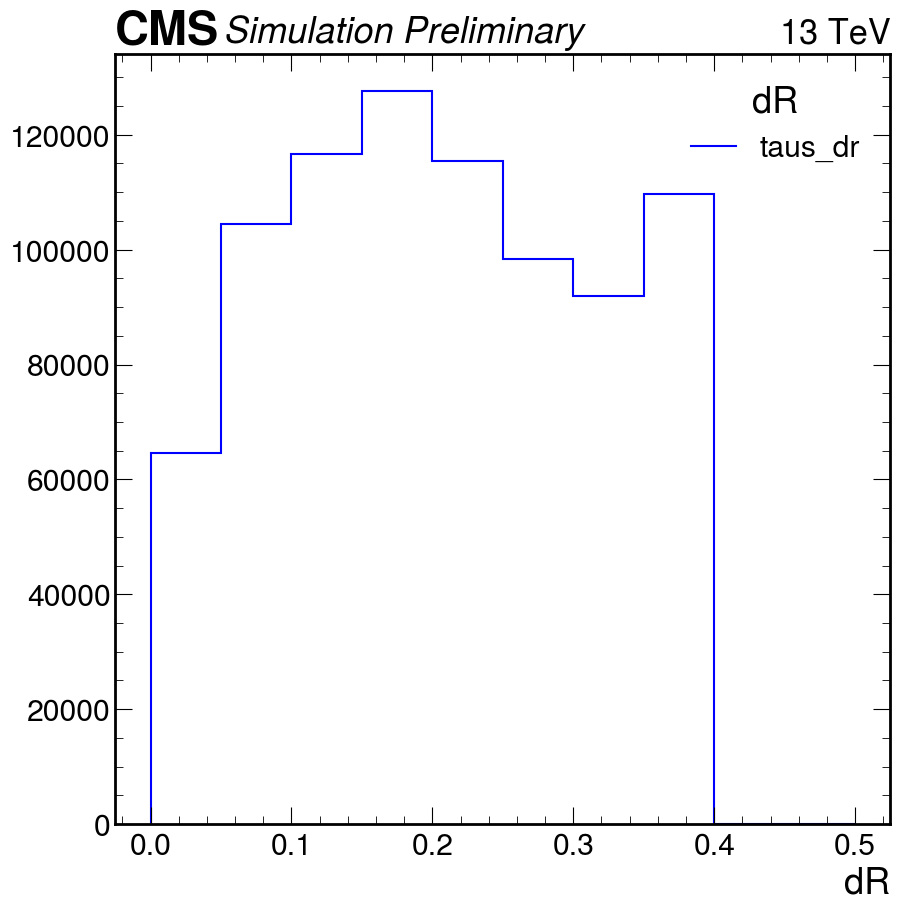

In [24]:
fig, ax = plt.subplots()
out["train_dataset_1"]["taus_dr"].plot1d(ax=ax,histtype='step',color='b')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_1/tau_tau_dR_hist.png',facecolor='w',dpi=300)

### for dataset 2

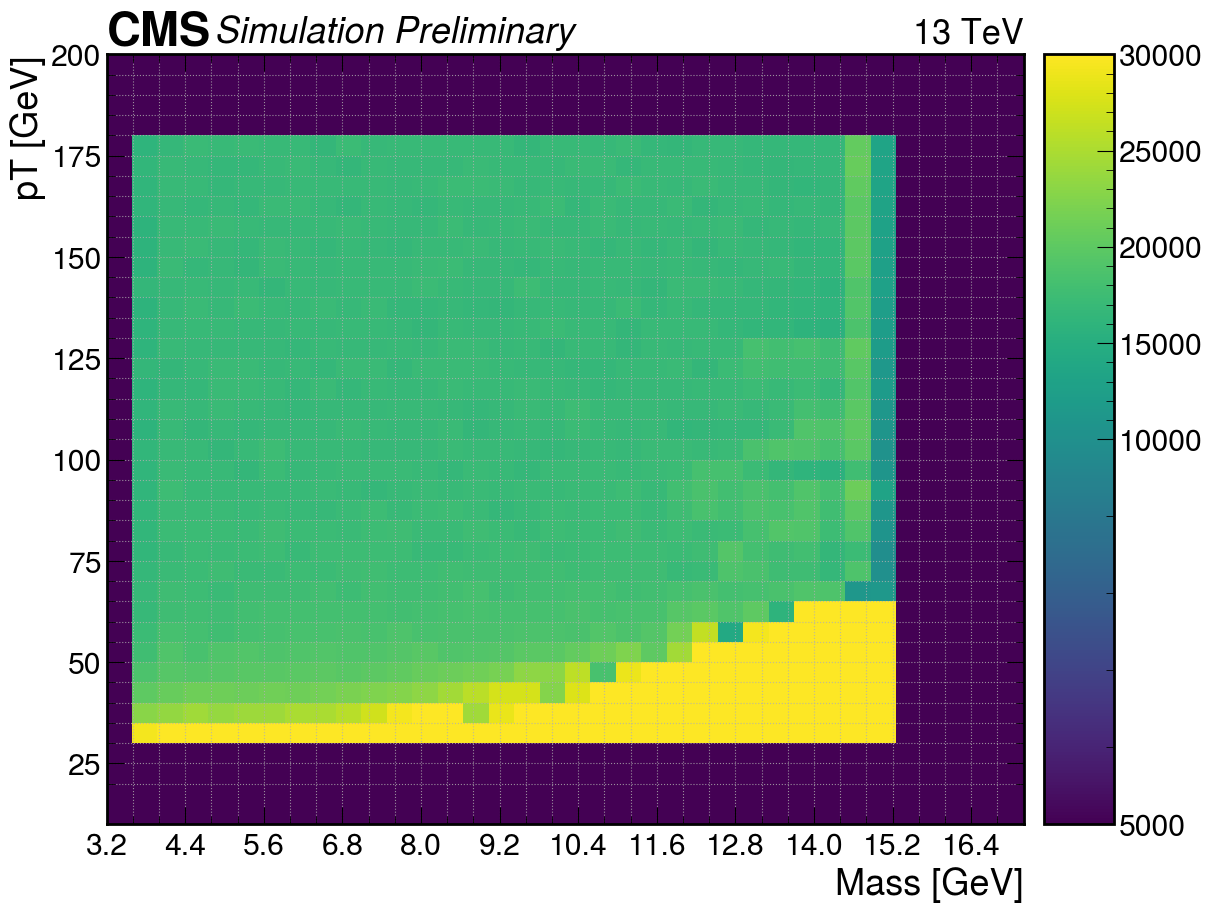

In [65]:
fig, ax = plt.subplots(figsize=(13,10))
norm = mcolors.TwoSlopeNorm(vmin=5000, vmax = 30000, vcenter=10000)
out["train_dataset_2"]["a_mass_pt"].plot2d(norm=norm)
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
ax.set_yticks(np.arange(20, 200, 5), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_mass_pt_2d_hist.png',facecolor='w',dpi=300)

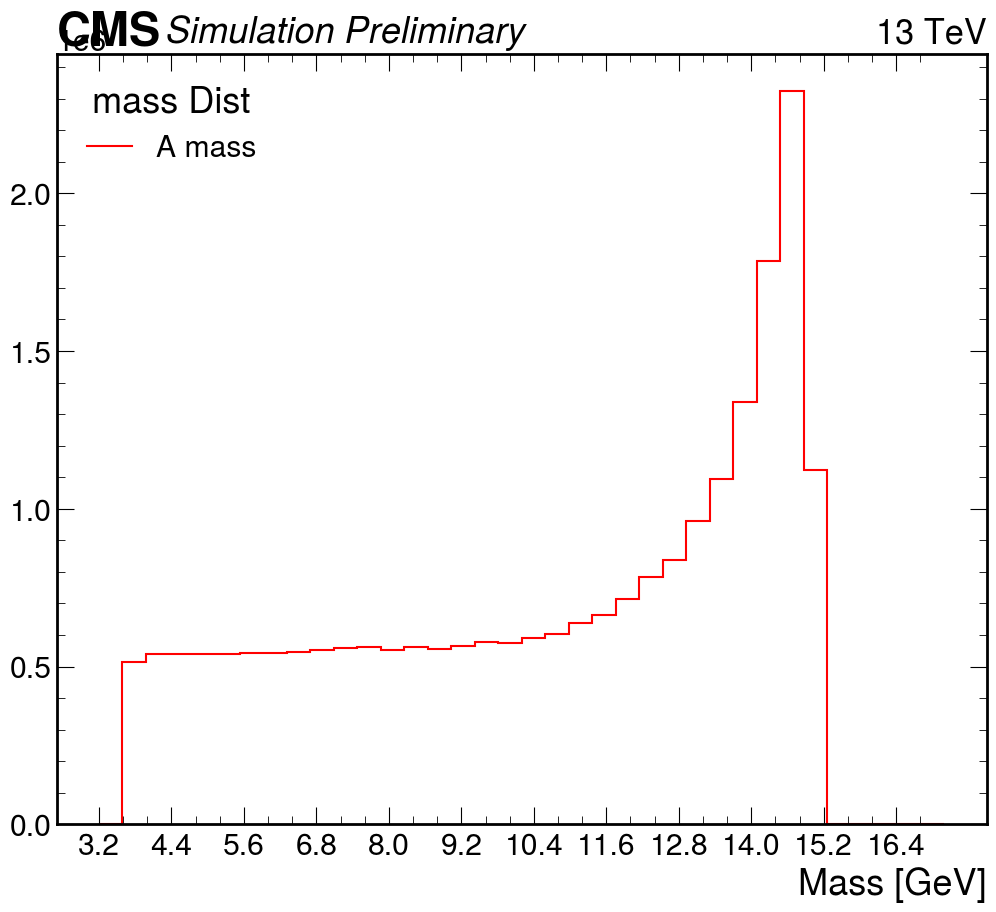

In [80]:
fig, ax = plt.subplots(figsize=(12,10))
out["train_dataset_2"]["a_mass"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="mass Dist")
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_mass_1d_hist.png',facecolor='w',dpi=300)

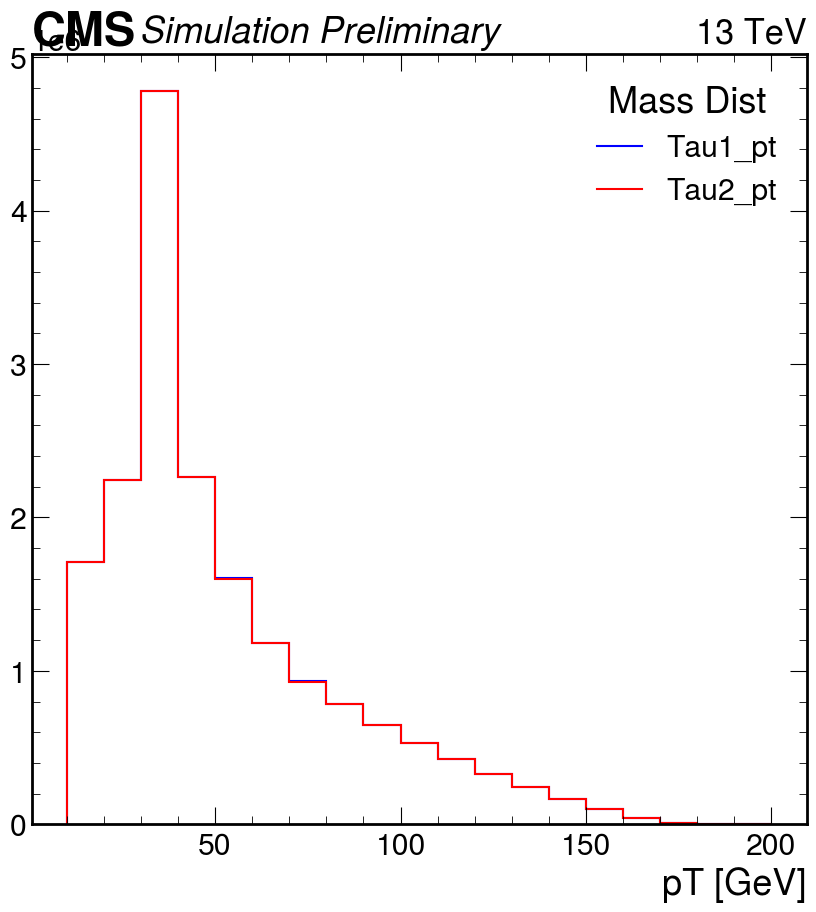

In [72]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_pt"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_pt"].plot1d(ax=ax,histtype='step', color='r')
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/tau1pttau2pt_hist.png',facecolor='w',dpi=300)

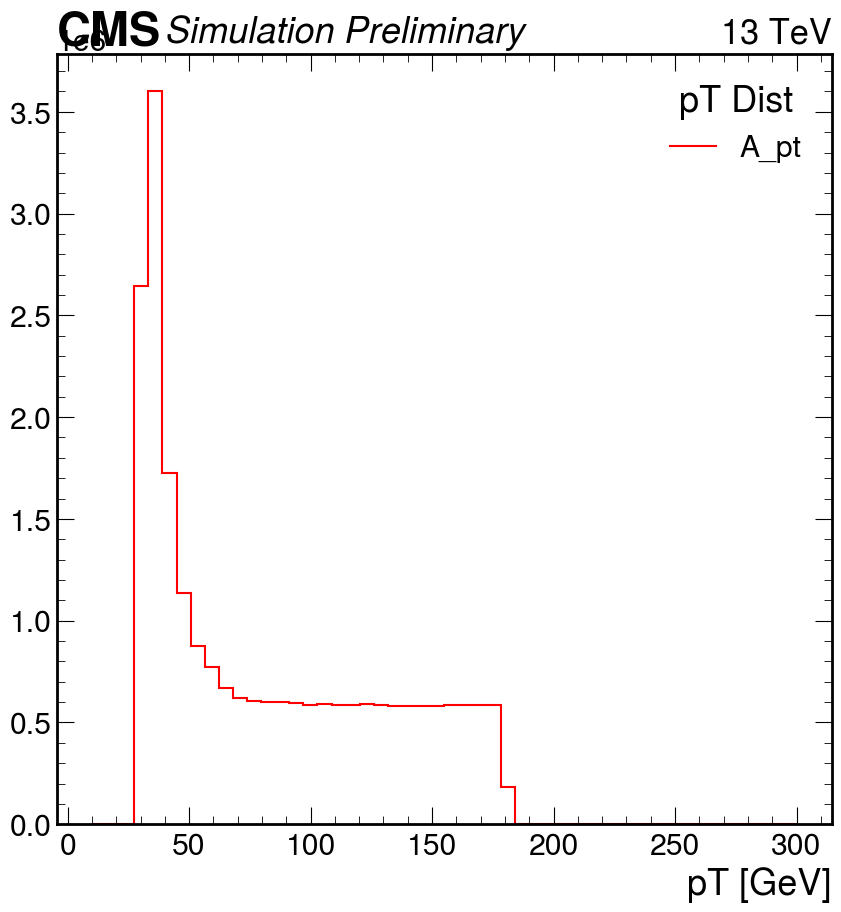

In [14]:
fig, ax = plt.subplots()
out["train_dataset_2"]["a_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend(title="pT Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/a_pt_1d_hist.png',facecolor='w',dpi=300)

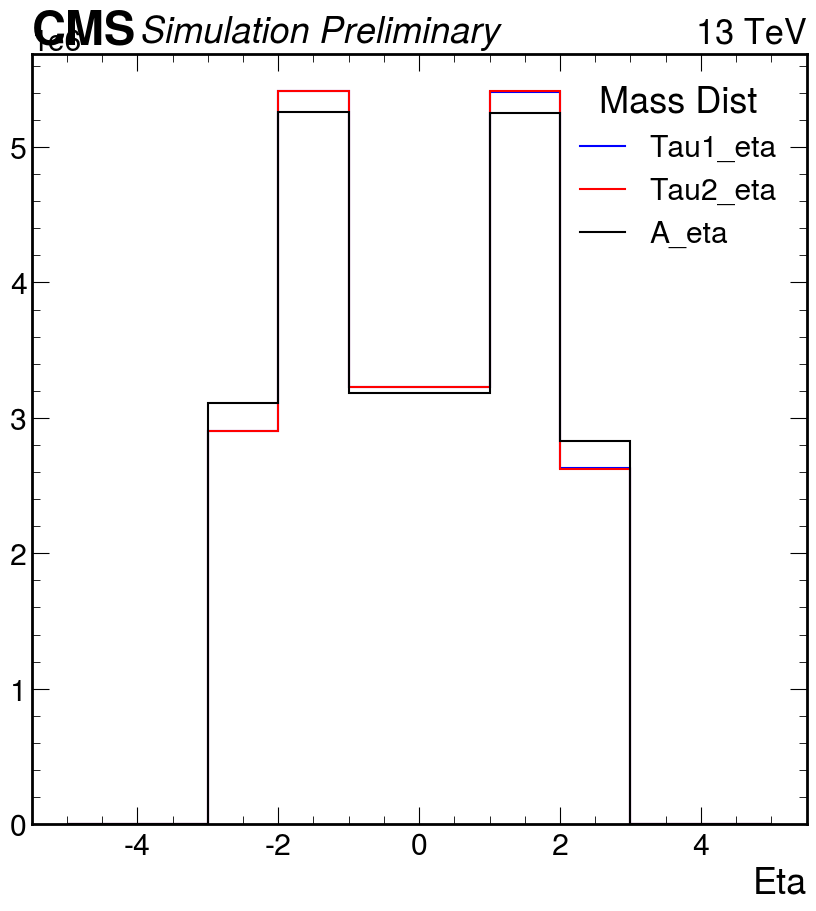

In [20]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_eta"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_eta"].plot1d(ax=ax,histtype='step', color='r')
out["train_dataset_2"]["a_eta"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/eta_dist_hist.png',facecolor='w',dpi=300)

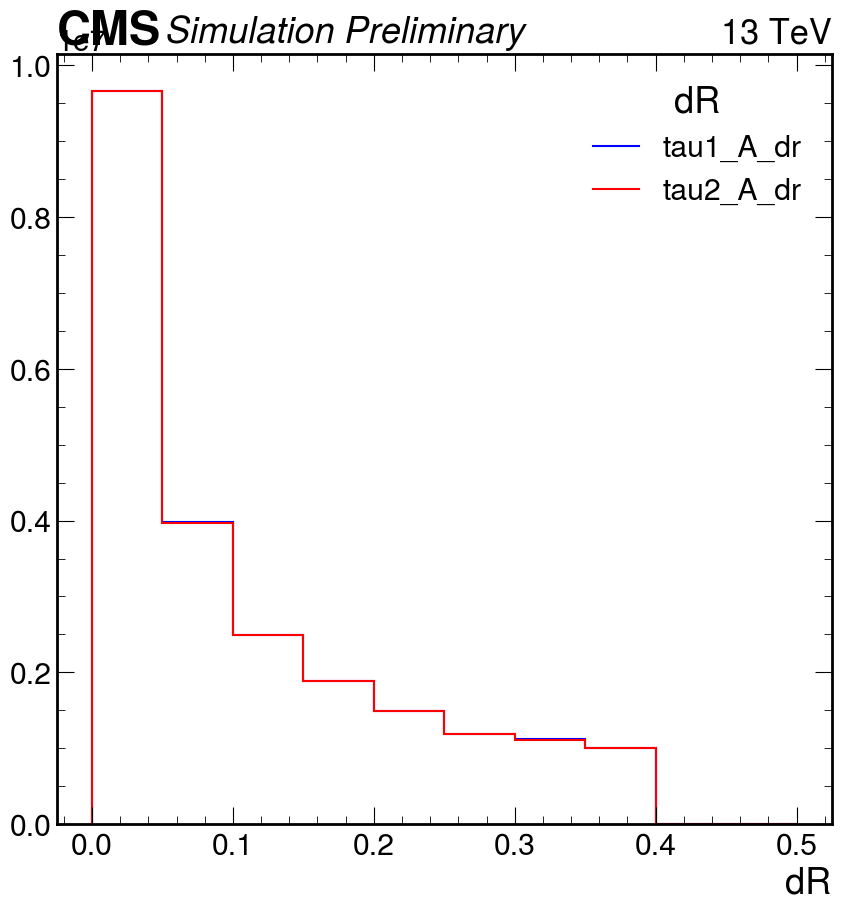

In [22]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_A_dr"].plot1d(ax=ax,histtype='step',color='b')
out["train_dataset_2"]["tau2_A_dr"].plot1d(ax=ax,histtype='step', color='r')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/A_tau_dR_hist.png',facecolor='w',dpi=300)

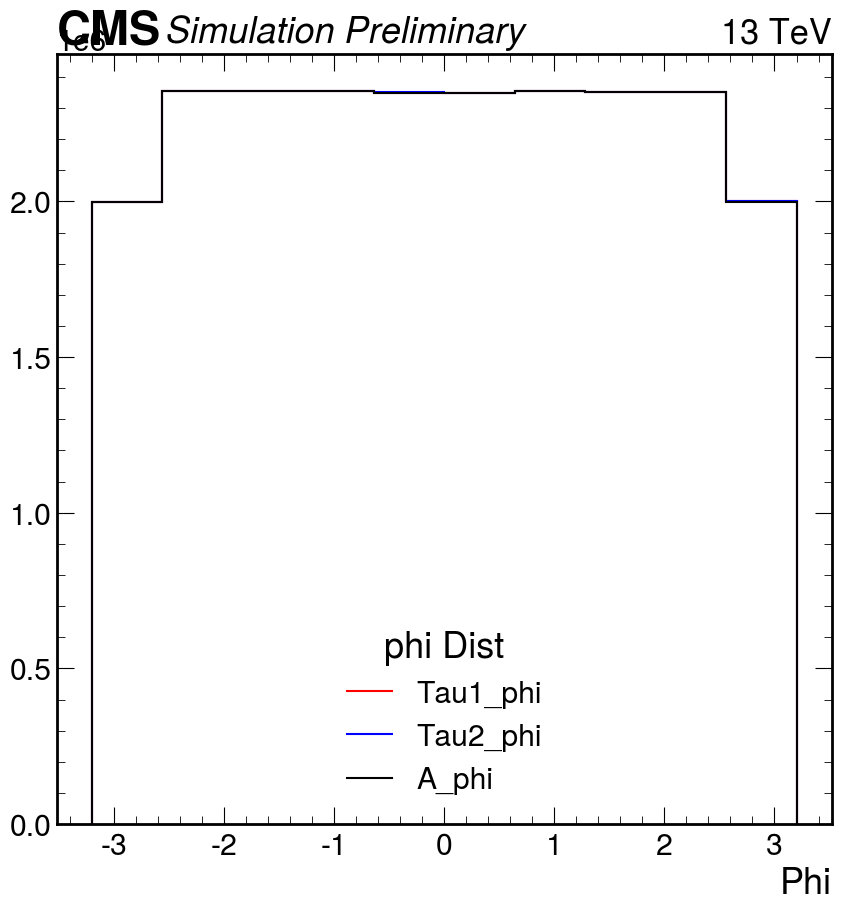

In [18]:
fig, ax = plt.subplots()
out["train_dataset_2"]["tau1_phi"].plot1d(ax=ax,histtype='step',color="r")
out["train_dataset_2"]["tau2_phi"].plot1d(ax=ax,histtype='step',color="b")
out["train_dataset_2"]["a_phi"].plot1d(ax=ax,histtype='step',color="black")
# ax.set_yscale("log")
ax.legend(title="phi Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/phi_dist_hist.png',facecolor='w',dpi=300)

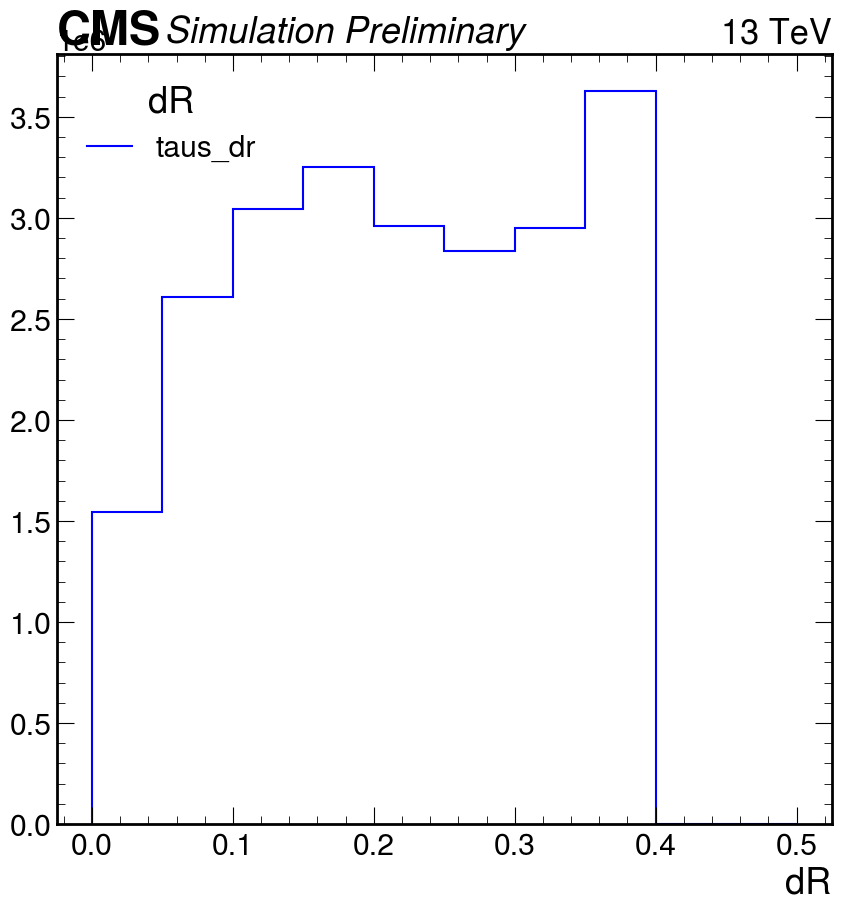

In [25]:
fig, ax = plt.subplots()
out["train_dataset_2"]["taus_dr"].plot1d(ax=ax,histtype='step',color='b')

# ax.set_yscale("log")
ax.legend(title="dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'plots_massreg_dataset_2/tau_tau_dR_hist.png',facecolor='w',dpi=300)